In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing


In [37]:
squat1_x_df = pd.read_csv(f'../../images/squat1_x_df.csv',index_col=0)
squat1_y_df = pd.read_csv(f'../../images/squat1_y_df.csv',index_col=0)
squat2_x_df = pd.read_csv(f'../../images/squat2_x_df.csv',index_col=0)
squat2_y_df = pd.read_csv(f'../../images/squat2_y_df.csv',index_col=0)

#標準化
def standarizatioin_df(df):
    ss = preprocessing.StandardScaler()
    l_2d_standardization = ss.fit_transform(df)
    df['leftHip'] = ss.fit_transform(df['leftHip'].values.reshape(-1, 1))
    df['rightHip'] = ss.fit_transform(df['rightHip'].values.reshape(-1, 1))
    return df


squat1_x_df = standarizatioin_df(squat1_x_df)
squat1_y_df = standarizatioin_df(squat1_y_df)
squat2_x_df = standarizatioin_df(squat2_x_df)
squat2_y_df = standarizatioin_df(squat2_y_df)


In [19]:
squat1_y_df

,nose,leftEye,rightEye,leftEar,rightEar,leftShoulder,rightShoulder,leftElbow,rightElbow,leftWrist,rightWrist,leftHip,rightHip,leftKnee,rightKnee,leftAnkle,rightAnkle,length
0,155.444252,143.264297,145.159224,148.969414,150.325620,172.363296,173.360571,129.177090,121.133777,73.257702,62.510589,285.240644,286.701315,372.553411,374.224259,445.849745,443.577464,3.1031
1,150.075072,142.702832,144.382687,149.655663,149.749380,171.323911,170.912820,124.434199,119.486655,74.566104,61.080351,282.137234,284.259258,372.821909,374.738864,446.257875,443.202115,0.0000
2,152.669608,141.939507,143.207091,149.557748,148.526284,170.705989,171.732878,120.902328,120.124576,74.569663,67.137914,280.406659,284.584449,373.267383,374.905047,446.269638,443.446801,0.0000
3,153.657880,142.012479,144.944876,149.488903,150.601155,170.853157,174.184075,116.804087,119.492549,66.835490,67.823038,280.106145,287.193062,372.765018,374.778863,446.376424,443.205712,0.0000
4,153.791853,141.982033,144.925498,149.421620,149.996068,171.900638,174.371029,126.858623,117.423376,73.339628,71.240609,280.067561,287.220829,373.032258,374.681520,446.627564,443.074904,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,154.287285,145.630340,142.185354,154.719814,148.222532,183.820308,182.403678,147.616852,158.338356,90.748778,101.984299,285.451990,303.254430,371.266295,373.256371,424.980209,442.328715,0.0000
74,152.332576,142.824365,145.740377,152.213029,148.776450,178.312084,181.260236,135.562266,144.638938,85.355943,85.752209,292.347639,303.424709,371.276896,370.325339,427.001173,443.549270,0.0000
75,148.850841,141.089451,141.100269,148.235710,147.570341,173.273102,177.426611,134.374066,137.249488,83.608847,79.898557,289.998651,286.742862,369.107079,368.865379,443.383750,441.565789,0.0000
76,147.831985,139.769534,138.761376,146.368570,145.773148,173.449033,172.396539,132.892601,123.910545,80.459324,67.486942,282.800375,286.249643,367.018971,369.385080,439.847101,441.651346,0.0000


In [38]:
def more_plotpoints(df1,df2):
    
    #df1について、プロット点を線分の内分点で割増
    df1_l_list = []
    df1_r_list = []
    df1_ttf_l_list = []
    df1_ttf_r_list = []
    
    #rightとleftについてそれぞれ計算
    print(df1.shape,df2.shape)
    for i in range(df1.shape[0]-1):
        for j in range(df2.shape[0]):
            df1_l_list.append(((df2.shape[0]-j)*df1.iloc[i,0]+j*df1.iloc[i+1,0])/df1.shape[0])
            df1_r_list.append(((df2.shape[0]-j)*df1.iloc[i,1]+j*df1.iloc[i+1,1])/df1.shape[0])
            '''df1_ttf_l_list.append(((df2.shape[0]-j)*df1.iloc[i,2]+j*df1.iloc[i+1,2])/df1.shape[0])
            df1_ttf_r_list.append(((df2.shape[0]-j)*df1.iloc[i,3]+j*df1.iloc[i+1,3])/df1.shape[0])'''
    
    #df2について、プロット点を線分の内分点で割増
    df2_l_list = []
    df2_r_list = []
    df2_ttf_l_list = []
    df2_ttf_r_list = []
    
    #rightとleftについてそれぞれ計算
    for i in range(df2.shape[0]-1):
        for j in range(df1.shape[0]):
            df2_l_list.append(((df1.shape[0]-j)*df2.iloc[i,0]+j*df2.iloc[i+1,0])/df2.shape[0])
            df2_r_list.append(((df1.shape[0]-j)*df2.iloc[i,1]+j*df2.iloc[i+1,1])/df2.shape[0])
            '''df2_ttf_l_list.append(((df1.shape[0]-j)*df2.iloc[i,2]+j*df2.iloc[i+1,2])/df2.shape[0])
            df2_ttf_r_list.append(((df1.shape[0]-j)*df2.iloc[i,3]+j*df2.iloc[i+1,3])/df2.shape[0])'''
    
    #df作成
    '''
    df1 = pd.DataFrame([df1_l_list,df1_r_list,df1_ttf_l_list,df1_ttf_r_list],index=['leftHip','rightHip','fft_leftHip','fft_rightHip']).T
    df2 = pd.DataFrame([df2_l_list,df2_r_list,df2_ttf_l_list,df2_ttf_r_list],index=['leftHip','rightHip','fft_leftHip','fft_rightHip']).T
    '''
    df1 = pd.DataFrame([df1_l_list,df1_r_list],index=['leftHip','rightHip']).T
    df2 = pd.DataFrame([df2_l_list,df2_r_list],index=['leftHip','rightHip']).T
    display(df1)
    display(df2)
    
    #描画
    fig = plt.figure(figsize=(24,9))
    ax = fig.add_subplot(1,2,1)
    ax.plot(df1['leftHip'])
    ax.plot(df1['rightHip'])
    ax = fig.add_subplot(1,2,2)
    ax.plot(df2['leftHip'])
    ax.plot(df2['rightHip'])
    plt.show()

    return df1,df2




def crop_filter(df):
    #初期レベルは一番座標が小さい所(画像では最高点)
    lowest_level_1 = int((df['leftHip'].idxmin() + df['rightHip'].idxmin()) / 2)
    highest_level =  int((df['leftHip'].idxmax() + df['rightHip'].idxmax()) / 2)
    lowest_level_2 = int((df['leftHip'][df['leftHip'].idxmax():].idxmin() + df['rightHip'][df['rightHip'].idxmax():].idxmin()) / 2)
        
    crop_df = df[['leftHip','rightHip']].iloc[lowest_level_1:lowest_level_2,:]
    
    return crop_df


def high_pass_filter(df):
    fig = plt.figure(figsize=(24,9))
    ax = fig.add_subplot(1,2,1)
    ax.plot(df['leftHip'])
    ax.plot(df['rightHip'])


    df['fft_leftHip'] = np.fft.fft(df['leftHip'])
    df['fft_rightHip'] = np.fft.fft(df['rightHip'])
    display(df)
    print(df.shape)

    
    ax = fig.add_subplot(1,2,2)
    freq = np.fft.fftfreq(df.shape[0])
    ax.plot(freq,df['fft_leftHip'].values.real)
    ax.plot(freq,df['fft_rightHip'].values.real)
    plt.show()

    return df

(98, 2) (64, 2)


,leftHip,rightHip
0,-0.639105,-0.657037
1,-0.639013,-0.656931
2,-0.638921,-0.656826
3,-0.638829,-0.656721
4,-0.638738,-0.656615
...,...,...
6203,-0.421337,-0.180934
6204,-0.421362,-0.180983
6205,-0.421387,-0.181032
6206,-0.421412,-0.181082


,leftHip,rightHip
0,-1.459718,-1.462917
1,-1.459761,-1.460045
2,-1.459804,-1.457173
3,-1.459846,-1.454301
4,-1.459889,-1.451429
...,...,...
6169,-0.801035,-1.145453
6170,-0.802586,-1.156817
6171,-0.804136,-1.168181
6172,-0.805687,-1.179545


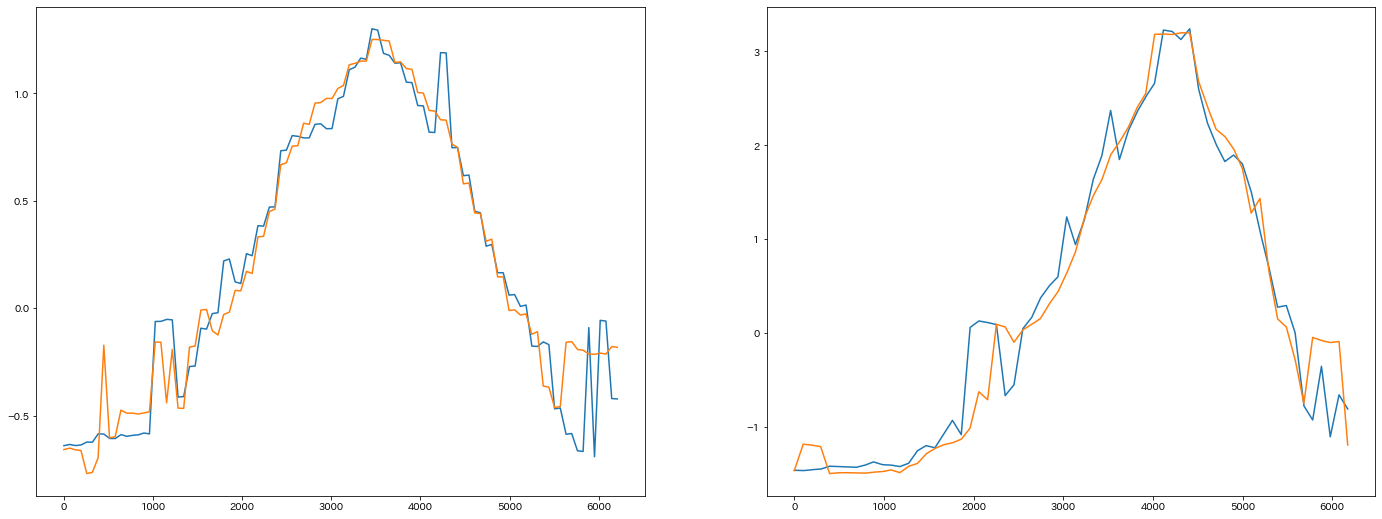

In [39]:
crop_squat2_y_df = crop_filter(squat2_y_df)
crop_squat1_y_df = crop_filter(squat1_y_df)

plot_squat2_y_df,plot_squat1_y_df = more_plotpoints(crop_squat2_y_df,crop_squat1_y_df)

In [41]:
’’’

68     1.991852
69     1.982605
70     1.817024
71     1.803814
72     1.746548
         ...   
126   -0.928824
127   -0.928078
128   -0.937796
129   -0.932510
130   -0.957151
Name: leftHip, Length: 63, dtype: float64
14 112


,leftHip,rightHip,fft_leftHip,fft_rightHip
14,-0.978629,-1.006087,30.688953+0.000000j,32.525732+0.000000j
15,-0.969635,-0.995768,-62.078961+19.218513j,-59.596633+21.064660j
16,-0.978084,-1.008189,3.370361-7.288793j,8.373435-6.245037j
17,-0.973986,-1.013149,2.422135+1.402949j,1.242080+3.273596j
18,-0.952519,-1.177263,1.280131+2.258496j,0.085969+5.214138j
...,...,...,...,...
107,-1.057876,-0.327501,3.046758-2.849680j,0.642722-3.771713j
108,-0.085549,-0.318872,1.280131-2.258496j,0.085969-5.214138j
109,-0.090766,-0.325963,2.422135-1.402949j,1.242080-3.273596j
110,-0.642899,-0.272597,3.370361+7.288793j,8.373435+6.245037j


(98, 4)


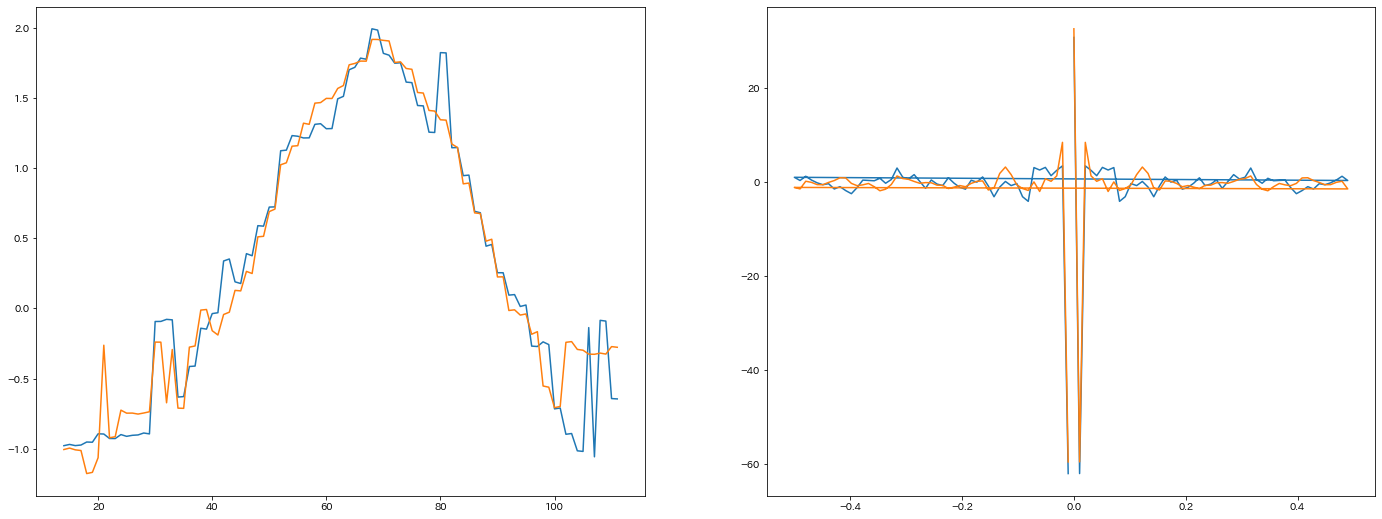

57    2.116993
58    1.702473
59    1.464698
60    1.313880
61    1.193884
62    1.238781
63    1.177754
64    0.985722
65    0.709030
66    0.463012
67    0.180737
68    0.192351
69    0.003060
70   -0.505549
71   -0.603551
72   -0.230181
73   -0.720263
74   -0.428955
75   -0.528188
76   -0.832281
77   -0.631916
Name: leftHip, dtype: float64
12 76


,leftHip,rightHip,fft_leftHip,fft_rightHip
12,-0.953285,-0.955374,12.725920+0.000000j,12.120180+0.000000j
13,-0.956017,-0.771577,-26.577556+34.092091j,-23.951445+36.842716j
14,-0.949172,-0.778136,-7.819195-6.341485j,-6.498767-6.570924j
15,-0.945330,-0.789506,3.004994-1.269783j,4.470506-1.490583j
16,-0.925141,-0.976268,-0.513675-0.858492j,-0.678477+1.915693j
...,...,...,...,...
71,-0.603551,-0.029420,-1.677976-0.710356j,0.869968-1.411088j
72,-0.230181,-0.051283,-0.513675+0.858492j,-0.678477-1.915693j
73,-0.720263,-0.065287,3.004994+1.269783j,4.470506+1.490583j
74,-0.428955,-0.057863,-7.819195+6.341485j,-6.498767+6.570924j


(64, 4)


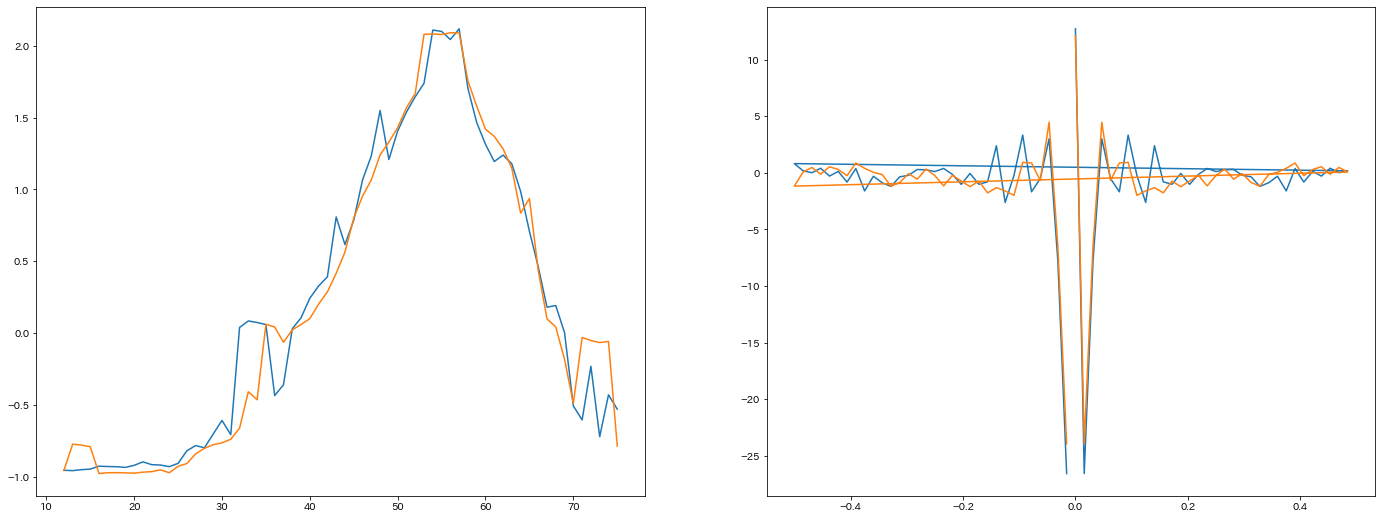

In [31]:
high_squat2_y_df = high_pass_filter(plot_squat2_y_df)
high_squat1_y_df = high_pass_filter(plot_squat1_y_df)

In [23]:
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [24]:

'''
a = cos_sim(crop_squat2_y_df,crop_squat1_y_df)
print(a)
'''

'\na = cos_sim(crop_squat2_y_df,crop_squat1_y_df)\nprint(a)\n'